In [ ]:
import kagglehub
import pandas as pd
import os

#Download the complete dataset (images + csv)
path = kagglehub.dataset_download("nirmalsankalana/fashion-product-text-images-dataset")

100%|██████████| 3.17G/3.17G [00:54<00:00, 62.9MB/s]

Extracting files...


In [ ]:
print("\nFiles in the dataset folder:")
print(os.listdir(path))

csv_path = os.path.join(path, 'data.csv')
images_dir = os.path.join(path, 'data')

df = pd.read_csv(csv_path)

# keeping only relevant columns
data = df[['image', 'description']].copy()

print("\nFirst 5 rows:")
print(data.head())


Files in the dataset folder:
['data', 'data.csv']

First 5 rows:
       image                                        description
0   3238.jpg  Round toed, black sports shoes with red accent...
1  43044.jpg  Style Note Built with the breathability and ze...
2  54018.jpg  Teal  handbag that has stitch detailing with a...
3   8141.jpg  Perfectly stylish, this fastrack analog wrist ...
4  22245.jpg  These id mid-top chukka shoes add a fresh spin...


Data pre-processing

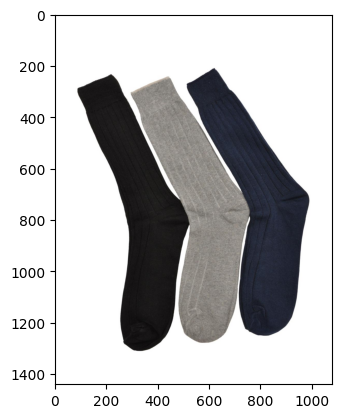

12394.jpg
It's comfort unparalleled once you slip into any one of these ribbed socks from Reid and Taylor. Made of cotton and lycra blend fabric, these socks can be worn both for work and casual outings. Made of cotton and lycra blend for all-day comfort, stretch and absorption of sweat Three pairs in black, navy blue and light grey to mix and match with various ensembles Rib knit cuff with roomy toe area for superior comfort and durability in all three pairs sock care Machine wash cold in 40 degree water using mild detergent Wash dark colours separately Do not use softeners Do not iron, dry clean or tumble dry Dry in shade


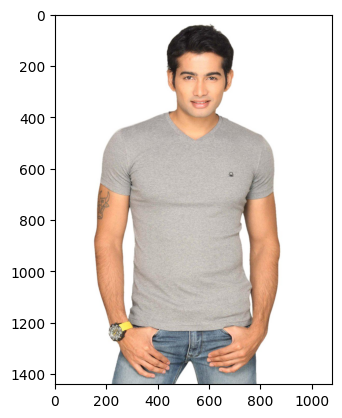

6245.jpg
Composition Grey V-neck t-shirt made of 100% cotton, with short sleeves and a Big Ben logo on left chest Fitting Comfort Wash care   Gentle machine wash in cool water at 30 C  Use mild detergent  Do not scrub  Do not bleach  Do not tumble dry  Do not wring  Do not dry in direct sunlight  Warm iron  Do not iron directly on print/embroidery  Wash, dry and iron inside out  Do not dry clean   Subtly stylish and smart, this V-neck t-shirt from united colors of benetton is designed to accentuate your handsome neckline. Team this increadibly comfortable tee with jeans or shorts and casual footwear for that uber cool look. Model statistics The model wears size M in t-shirts Height-6', Shoulders-18"


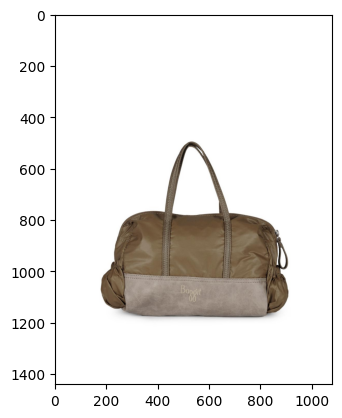

47398.jpg
Style Note Multi purpose bags with oodles of style and tons of detailing mark baggit out - and they also succeed in keeping the designs understated and charming. Easily to pair up with whatever you're wearing to complement any outfit. Go ahead and grab your favourite from Baggit's classy range of bags. Product Details Brown bag Two short handles One main zippered compartment with two pockets inside with elasticated mouths Two open compartments on the sides with elasticated mouths Material and Care Synthetic Wipe with a clean damp cloth when needed Size Height: 16 cm Width: 23 cm Depth: 7 cm


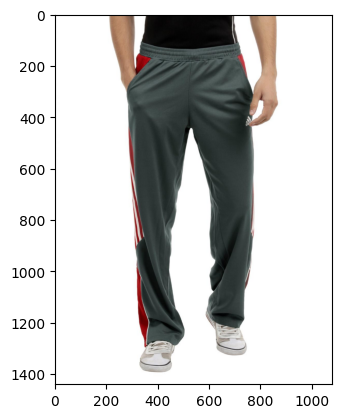

53740.jpg
-


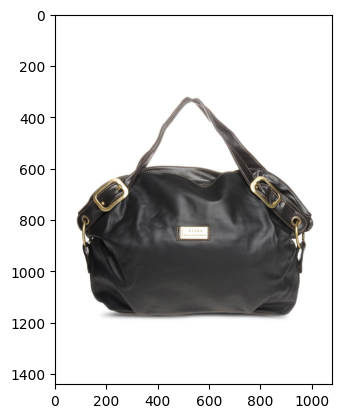

53944.jpg
Black handbag with two short handles for carrying ease and style Mock buckle detail on both the handles Has one main roomy zipped compartment, one zippered separator, one inner zipped compartment and an organiser pouch for essentials Metal brand badge on the front One pocket with a zip closure on the back


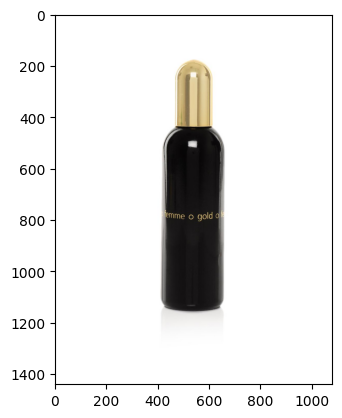

58959.jpg
Colour me Gold is a perfume spray for women which comes in a sleek black bottle with a gold cap. It is encased in a tall Colour Me plastic case. It has an easy aerosol spray canister.


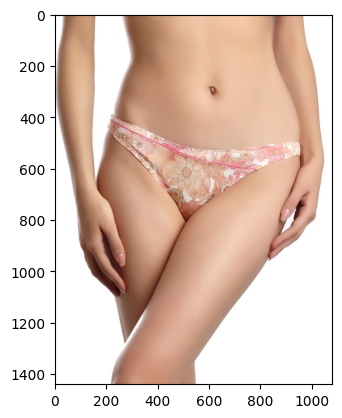

51037.jpg
Style Note enamor is a brand that has become synonymous with femininity, style and luxury. Give your lingerie drawer a quirky twist with this floral printed piece from the brand. Its blended composition ensures a snug and comfortable Fit. Product Details White and pink floral printed briefs, lace insert in front, soft fabric panel inlay at crotch, elasticized waistband Material and Care 92% Polyester   and 8% spandex Hand wash warm Drip dry in shade Size and Fit Low rise The model( height 5'8"and waist 28") is wearing a size M


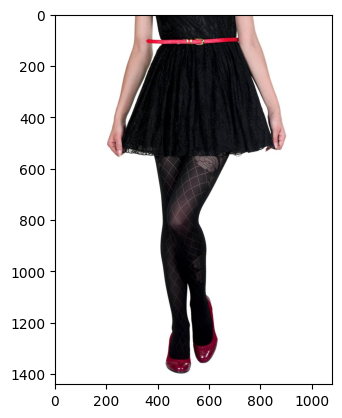

33982.jpg
  Style Note  Sylish and in-vogue, this pair of stockings from femella has a hint of retro chic, making it a contemporary essential. The luxe, stretchy fabric is designed to flatter your shape and become a perfect everyday wear. Style this with a short dress and clunky heels.  Product Details  Black stockings, rose print, elastic waistband, ankle length  Material and care  Blended fabric  Hand wash cool  Do not iron or tumble dry  Size and Fit  One size  Style Note Sylish and in-vogue, this pair of stockings from Femella has a hint of retro chic, making it a contemporary essential. The luxe, stretchy fabric is designed to flatter your shape and become a perfect everyday wear. Style this with a short dress and clunky heels. Product Details Black stockings, rose print, elastic waistband, ankle length Material and care Blended fabric Hand wash cool Do not iron or tumble dry Size and fit Free size


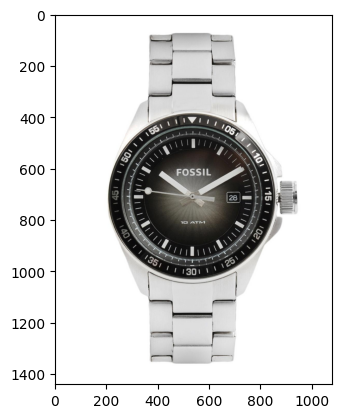

51661.jpg
Case style: Analogue watch with a circular case and a stainless steel back, has a fixed bezel Dial style: Black dial, has hands and markings Features: A screw to reset time, a date aperture Strap style: Silver-toned strap, secured with a fold-over clasp Water-resistant up to 50 m Comes in a signature Fossil case Warranty: 1 year against manufacturing defects from the date of purchase Warranty provided by Brand Owner / Manufacturer


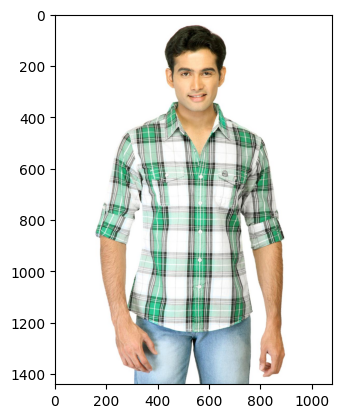

13389.jpg
Composition Green, white and black check shirt with light blue accents, made of 100% cotton, has full sleeves with button cuffs, tipped collar with a buttoned front placket, buttoned flap pockets on either chest with an embroidered Big Ben logo on the left pocket flap, and a curved hem Fitting Comfort Wash care only hand wash in cold water using a mild detergent Wash dark colours separately Do not bleach, wring or tumble dry Flat dry in shade Mild iron, and do not iron on print/embellishment/embroidery Perfect on style and great in comfort, this checked shirt from united colors of benetton is sure to quickly elevate into a wardrobe favourite as that perfect casual wear. The sleeve design and attention to detail oozes comfort, while the fabric is sure to keep you fresh all day. Team this with slim jeans or simple chinos for a knockout style. Model statistics The model wears size M in shirts Height-5.11", Shoulders-18.5"


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# choosing 10 random lines in csv
sample_data = data.sample(10)

for i, (index, row) in enumerate(sample_data.iterrows()):
    image_name = row['image']
    description = row['description']
    img_path = os.path.join(images_dir, image_name)

    # displaying the image
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.show()

    print(image_name)
    print(description)


In [ ]:
# cleaning

initial_count = len(data)

# checking duplicates
image_duplicates_count = data.duplicated(subset=['image']).sum()
print(f"Duplicates: {image_duplicates_count}")
data = data.drop_duplicates(subset=['image'])

# checking missing values
nan_count = data.isnull().sum()
print("\nMissing values:")
print(nan_count)
data = data.dropna()

# check empty strings in description
empty_string_count = (data['description'].str.strip() == '').sum()
print(f"\nEmpty descriptions: {empty_string_count}")
data = data[data['description'].str.strip().astype(bool)]


final_count = len(data)
print(f"Dataset size after cleaning: {final_count}")

Duplicates: 0

Missing values:
image            0
description    281
dtype: int64

Empty descriptions: 2
Dataset size after cleaning: 44158


In [ ]:
from sklearn.model_selection import train_test_split

# split the dataset
train_df, test_df = train_test_split(data, test_size=0.1, random_state=42)

# resetting indices in the splits
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)


print(f"Training set size: {len(train_df)}")
print(f"Testing set size:  {len(test_df)}")

Training set size: 39742
Testing set size:  4416


In [ ]:
print(train_df.head())
print('\n')
print(test_df.head())

       image                                        description
0  33196.jpg  Purple printed tunic made of sheer, woven 100%...
1  59656.jpg  Blue and white georgette printed sari with shi...
2  38038.jpg  Case style: Analogue watch with a round steel ...
3   6774.jpg  Composition Light blue full sleeve shirt made ...
4  28068.jpg  Style Note Revel in the comfort of soft fabric...


       image                                        description
0  45789.jpg  Style Note The Spanish influences in the desig...
1  40970.jpg  Style Note When you wear buckaroo shoes, you a...
2  20901.jpg  Inspired by the primal attitudes these sandals...
3  49496.jpg  Round toed low-tops with four-hole lace-ups an...
4   3402.jpg  Composition Pure leather tote bag in yellow wi...


In [ ]:
import torch
from torch.utils.data import Dataset
from PIL import Image # Import Image from PIL

class FashionDataset(Dataset):
    def __init__(self, dataframe, image_dir, transform=None):
        """
        Args:
            dataframe (pd.DataFrame): DataFrame with 'image' and 'description' columns.
            image_dir (str): Directory where images are stored.
            transform (callable, optional): Optional transform to be applied on a sample (e.g. for CLIP).
        """
        self.dataframe = dataframe
        self.image_dir = image_dir
        self.transform = transform

    def __len__(self):
        """Returns the total number of samples."""
        return len(self.dataframe)

    def __getitem__(self, idx):
        # getting image name and description
        row = self.dataframe.iloc[idx]
        image_name = row['image']
        text = row['description']

        img_path = os.path.join(self.image_dir, image_name)
        image = Image.open(img_path)
        if self.transform:
            image = self.transform(image)

        return {"image": image, "text": text}

In [ ]:
from transformers import CLIPProcessor, CLIPModel
import torch
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"

# дoad the CLIP model
model_id = "openai/clip-vit-base-patch32"
model = CLIPModel.from_pretrained(model_id).to(device)
processor = CLIPProcessor.from_pretrained(model_id)

print("model loaded successfully\n")

# zero-shot performance check
samples = train_df.sample(3)

for i, (index, row) in enumerate(samples.iterrows()):
    image_name = row['image']
    text = row['description']
    img_path = os.path.join(images_dir, image_name)

    try:
        image = Image.open(img_path)

        # prepare inputs using the processor
        inputs = processor(
            text=[text],
            images=image,
            return_tensors="pt",
            padding=True,
            truncation=True
        ).to(device)

        # inference
        with torch.no_grad():
            outputs = model(**inputs)

        # the score
        score = outputs.logits_per_image.item()

        print(image_name)
        print(text[:100])
        print(f"CLIP Score: {score:.4f}\n")

    except Exception as e:
        print(f"Error processing {image_name}: {e}")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

model loaded successfully

33256.jpg
Style Note Let your little girl enjoy the cute things in life and reach a step closer to her dreams 
CLIP Score: 34.9217

29782.jpg
Green trousers made of a cotton blend, has a flat front, two pockets on the sides, two welt pockets 
CLIP Score: 34.2201

5099.jpg
Composition White round neck t-shirt made of 100% cotton, with ribbing around neckline and graphic o
CLIP Score: 24.6830



In [ ]:
from google.colab import drive

drive.mount('/content/drive')
SAVE_PATH = "/content/drive/MyDrive/clip_project_checkpoints"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Epoch 1/4


Validating: 100%|██████████| 138/138 [02:29<00:00,  1.08s/it]


Results Epoch 1:
Train Loss: 0.6322 | Train Score: 28.17
Val Score:  29.54
Checkpoint saved to /content/drive/MyDrive/clip_project_checkpoints/checkpoint-1

Epoch 2/4


Validating: 100%|██████████| 138/138 [02:31<00:00,  1.10s/it]


Results Epoch 2:
Train Loss: 0.4209 | Train Score: 30.81
Val Score:  30.86
Checkpoint saved to /content/drive/MyDrive/clip_project_checkpoints/checkpoint-2

Epoch 3/4


Validating: 100%|██████████| 138/138 [02:29<00:00,  1.08s/it]


Results Epoch 3:
Train Loss: 0.3593 | Train Score: 32.37
Val Score:  32.52
Checkpoint saved to /content/drive/MyDrive/clip_project_checkpoints/checkpoint-3

Epoch 4/4


Validating: 100%|██████████| 138/138 [02:32<00:00,  1.11s/it]


Results Epoch 4:
Train Loss: 0.3053 | Train Score: 33.42
Val Score:  32.77
Checkpoint saved to /content/drive/MyDrive/clip_project_checkpoints/checkpoint-4


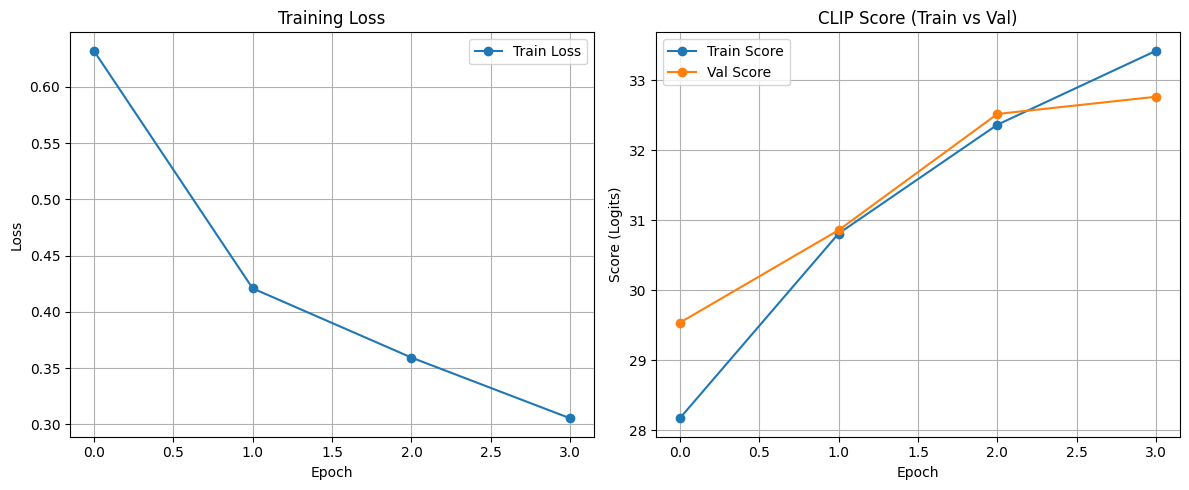

In [ ]:
import torch
from torch.utils.data import DataLoader
from torch import nn
import torch.optim as optim
from tqdm import tqdm
import matplotlib.pyplot as plt

BATCH_SIZE = 32
LEARNING_RATE = 5e-5
EPOCHS = 4

# derictory to save checkpoints
if not os.path.exists(SAVE_PATH):
    os.makedirs(SAVE_PATH)

# collate_fn for processing images and texts with the CLIP processor
def collate_fn(batch):
    images = [item['image'] for item in batch]
    texts = [item['text'] for item in batch]

    inputs = processor(
        text=texts,
        images=images,
        return_tensors="pt",
        padding=True,
        truncation=True,
        max_length=77
    )
    return inputs

train_dataset = FashionDataset(train_df, images_dir)
test_dataset = FashionDataset(test_df, images_dir)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)

#loss and training

optimizer = optim.AdamW(model.parameters(), lr=LEARNING_RATE)
loss_img = nn.CrossEntropyLoss()
loss_txt = nn.CrossEntropyLoss()

def train_epoch(model, loader, optimizer):
    model.train()
    total_loss = 0
    total_score = 0
    count = 0

    loop = tqdm(loader, desc="Training")

    for batch in loop:
        input_ids = batch['input_ids'].to(device)
        pixel_values = batch['pixel_values'].to(device)
        attention_mask = batch['attention_mask'].to(device)

        optimizer.zero_grad()

        outputs = model(input_ids=input_ids, pixel_values=pixel_values, attention_mask=attention_mask)

        logits_per_image = outputs.logits_per_image
        logits_per_text = outputs.logits_per_text

        batch_size = logits_per_image.shape[0]
        labels = torch.arange(batch_size).to(device)

        loss_i = loss_img(logits_per_image, labels)
        loss_t = loss_txt(logits_per_text, labels)
        loss = (loss_i + loss_t) / 2   # symmetric loss

        loss.backward()
        optimizer.step()

        # calculate CLIP score (average of diagonal elements - correct pairs)
        current_score = logits_per_image.diag().mean().item()

        total_loss += loss.item()
        total_score += current_score
        count += 1

        loop.set_postfix(loss=loss.item(), score=current_score)

    return total_loss / count, total_score / count

def evaluate(model, loader):
    model.eval()
    total_score = 0
    count = 0

    with torch.no_grad():
        for batch in tqdm(loader, desc="Validating"):
            input_ids = batch['input_ids'].to(device)
            pixel_values = batch['pixel_values'].to(device)
            attention_mask = batch['attention_mask'].to(device)

            outputs = model(input_ids=input_ids, pixel_values=pixel_values, attention_mask=attention_mask)

            logits_per_image = outputs.logits_per_image
            current_score = logits_per_image.diag().mean().item()

            total_score += current_score
            count += 1

    return total_score / count

history = {
    "train_loss": [],
    "train_score": [],
    "val_score": []
}

for epoch in range(EPOCHS):
    print(f"\nEpoch {epoch+1}/{EPOCHS}")

    train_loss, train_score = train_epoch(model, train_loader, optimizer)
    history["train_loss"].append(train_loss)
    history["train_score"].append(train_score)

    # validation
    val_score = evaluate(model, test_loader)
    history["val_score"].append(val_score)

    print(f"Results Epoch {epoch+1}:")
    print(f"Train Loss: {train_loss:.4f} | Train Score: {train_score:.2f}")
    print(f"Val Score:  {val_score:.2f}")

    checkpoint_dir = f"{SAVE_PATH}/checkpoint-{epoch+1}" # checkpoint saving
    if not os.path.exists(checkpoint_dir):
        os.makedirs(checkpoint_dir)
    model.save_pretrained(checkpoint_dir)
    processor.save_pretrained(checkpoint_dir)
    print(f"Checkpoint saved to {checkpoint_dir}")

# Visualization

plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss', marker='o')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# CLIP Scores
plt.subplot(1, 2, 2)
plt.plot(history['train_score'], label='Train Score', marker='o')
plt.plot(history['val_score'], label='Val Score', marker='o')

plt.title('CLIP Score (Train vs Val)')
plt.xlabel('Epoch')
plt.ylabel('Score (Logits)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

During data preprocessing, we encountered very few missing or duplicate values, rendering a significant portion of the dataset suitable for training. The product descriptions are detailed and align well with the images: CLIP scores exceed 20 and even 30, indicating strong confidence from the pre-trained model.

Throughout the training process, the CLIP score remained consistently high across all epochs, suggesting excellent performance during inference.

Product search

In [ ]:
import torch
from torch.utils.data import DataLoader
from tqdm import tqdm
import pickle
import os

CHECKPOINT_PATH = "/content/drive/MyDrive/clip_project_checkpoints/checkpoint-4" # uploading the last checkpoint
EMBEDDINGS_PATH = "/content/drive/MyDrive/clip_project_checkpoints/image_embeddings.pkl" # path to save the index
BATCH_SIZE = 64

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

model = CLIPModel.from_pretrained(CHECKPOINT_PATH).to(device)
processor = CLIPProcessor.from_pretrained(CHECKPOINT_PATH)
model.eval()
print("Model loaded from last checkpoint")

# using the clean'data' dataframe we cleaned at the beginning
full_dataset = FashionDataset(data, images_dir)

# collate function for images only
def collate_fn_images(batch):
    images = [item['image'] for item in batch]

    inputs = processor(
        images=images,
        return_tensors="pt",
        padding=True
    )
    return inputs

print("Index being built\n")

image_embeddings = []
image_filenames = [] # names are needed to organize embeddings in the index

dataloader = DataLoader(full_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn)
# shuffle=False is critical becuase we don't have names of images so we need to rely on the order only

all_vectors = []

with torch.no_grad():
    for batch in tqdm(dataloader, desc="Indexing Images"):
        pixel_values = batch['pixel_values'].to(device)

        batch_features = model.get_image_features(pixel_values=pixel_values)

        batch_features = batch_features / batch_features.norm(p=2, dim=-1, keepdim=True) # important for cos sim

        all_vectors.append(batch_features.cpu())

final_embeddings = torch.cat(all_vectors) # concatenating all batches

print(f"Embeddings shape: {final_embeddings.shape}")

filenames = data['image'].tolist()
descriptions = data['description'].tolist()

save_data = {
    "embeddings": final_embeddings,
    "filenames": filenames,
    "descriptions": descriptions
}

with open(EMBEDDINGS_PATH, 'wb') as f:
    pickle.dump(save_data, f)

print(f"Embeddings saved to {EMBEDDINGS_PATH}") # saving the index to use it in a search

Using device: cuda
Model loaded from last checkpoint
Index being built



Indexing Images: 100%|██████████| 690/690 [27:54<00:00,  2.43s/it]


Embeddings shape: torch.Size([44158, 512])
Embeddings saved to /content/drive/MyDrive/clip_project_checkpoints/image_embeddings.pkl


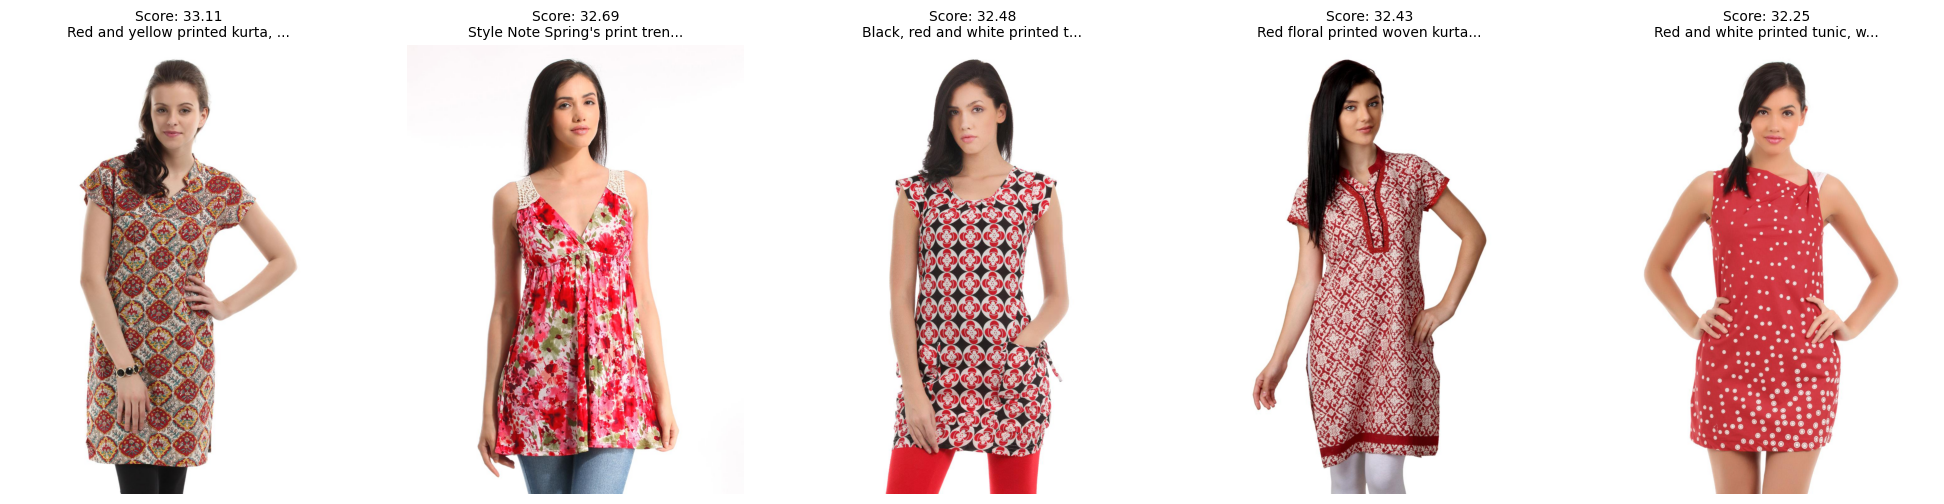

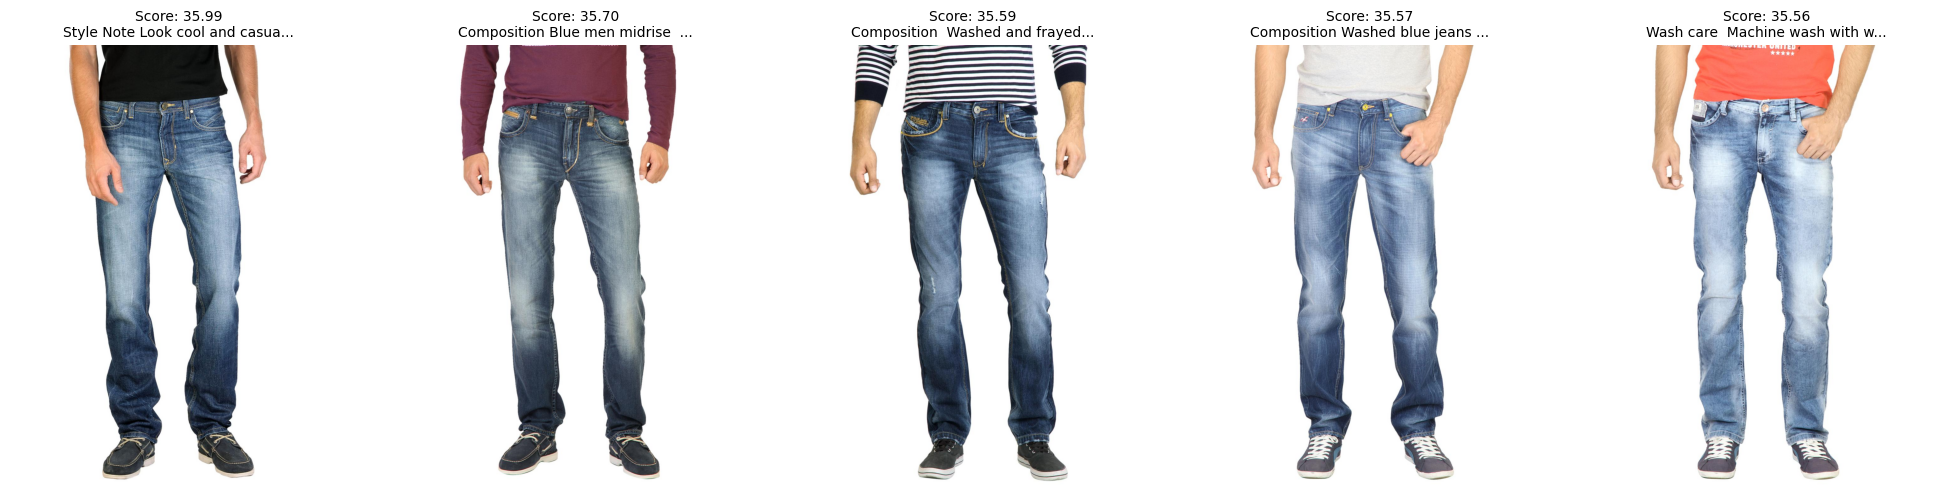

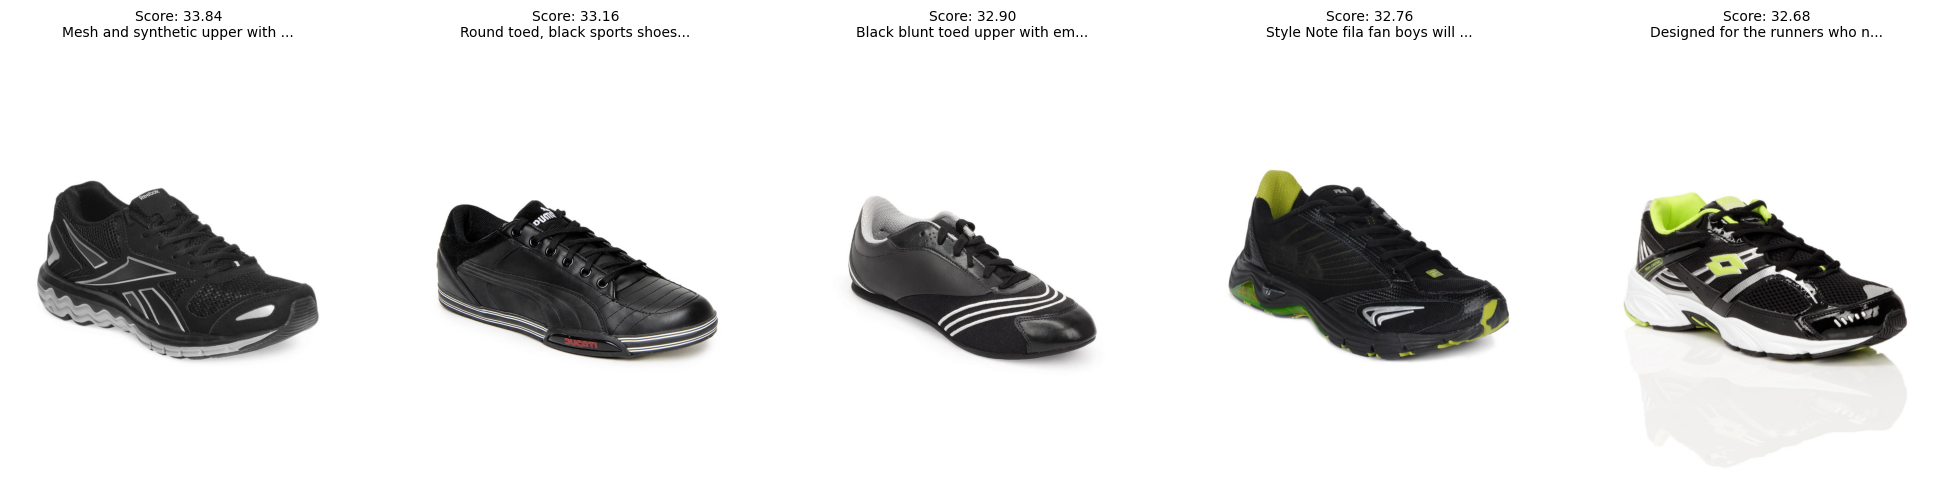

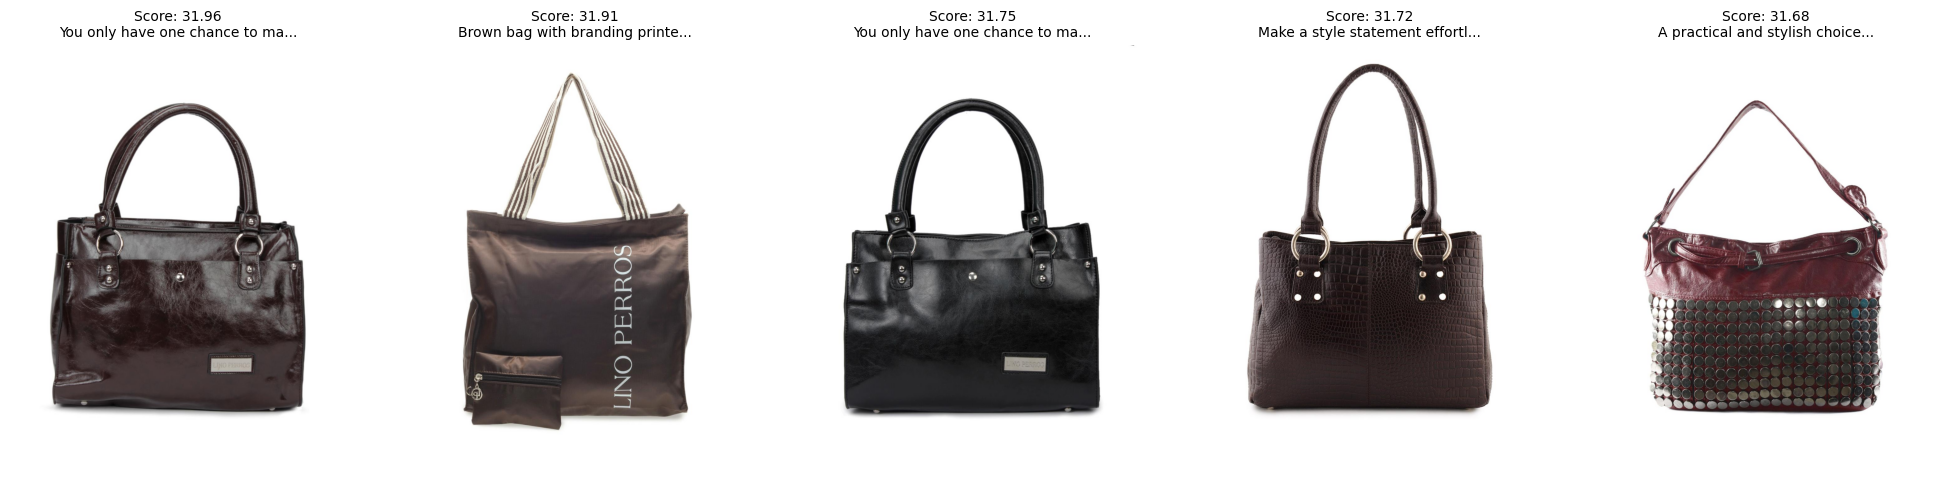

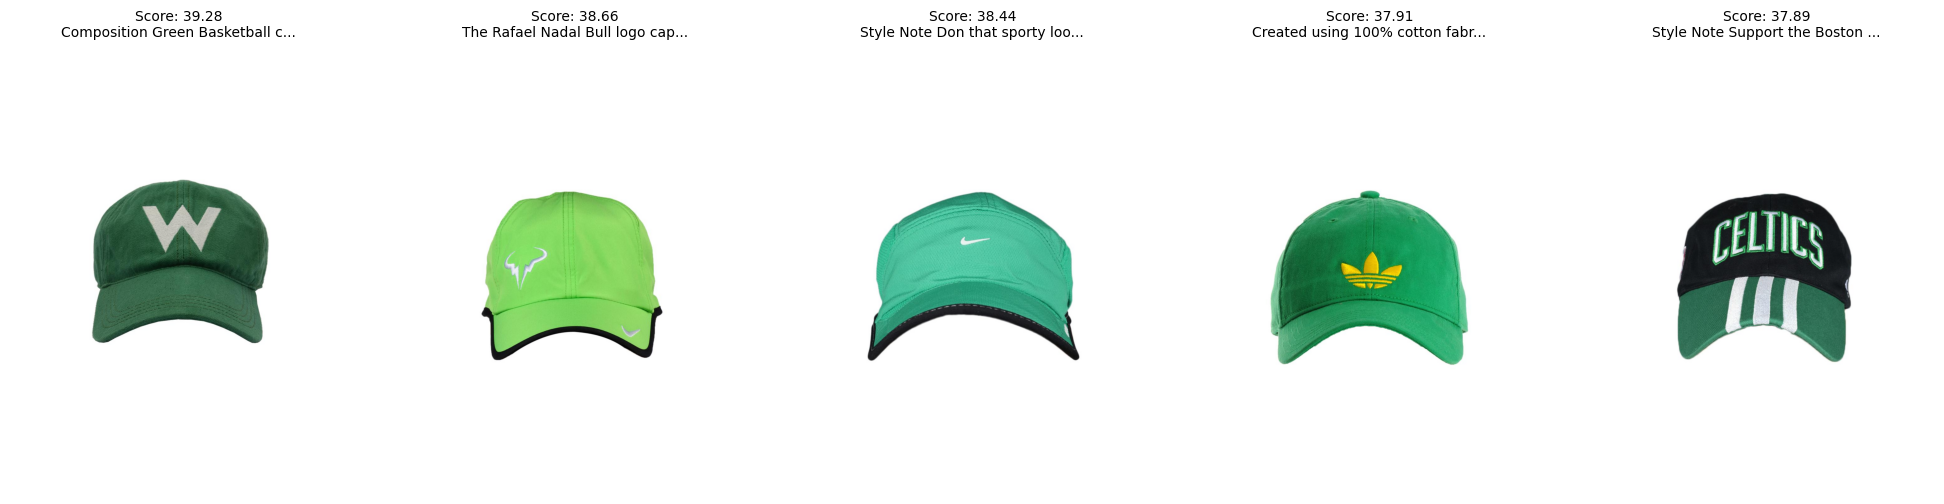

In [ ]:
import pickle
import matplotlib.pyplot as plt
import torch
from PIL import Image
from transformers import CLIPProcessor, CLIPModel
import torch
from PIL import Image

model_id = "openai/clip-vit-base-patch32"
model = CLIPModel.from_pretrained(model_id).to(device)
processor = CLIPProcessor.from_pretrained(model_id)

# loading embeddings index
with open(EMBEDDINGS_PATH, 'rb') as f:
    index_data = pickle.load(f)
image_embeddings = index_data["embeddings"].to(device)
filenames = index_data["filenames"]
descriptions = index_data["descriptions"]

def search_product(query, top_k=5):
    """
    Searches for images matching the text query.
    """
    with torch.no_grad():
        inputs = processor(text=[query], return_tensors="pt", padding=True).to(device) # converting text query to vector
        text_features = model.get_text_features(**inputs)

        # normalize the text vector  for cosine similarity
        text_features /= text_features.norm(dim=-1, keepdim=True)

    similarity = (100.0 * text_features @ image_embeddings.T) # comparing the text vector with all image vectors at once

    values, indices = similarity[0].topk(top_k) # take top K matches

    # vizualization
    plt.figure(figsize=(20, 5))

    for i, idx in enumerate(indices):
        idx = idx.item()
        score = values[i].item()

        image_name = filenames[idx]
        desc = descriptions[idx]

        img_path = os.path.join(images_dir, image_name)

        plt.subplot(1, top_k, i + 1)
        try:
            img = Image.open(img_path)
            plt.imshow(img)
            plt.axis('off')

            plt.title(f"Score: {score:.2f}\n{desc[:30]}...", fontsize=10)
        except:
            plt.text(0.5, 0.5, "Img Not Found", ha='center')
            plt.axis('off')

    plt.tight_layout()
    plt.show()

# testing
queries = [
    "red floral dress",
    "blue denim jeans",
    "black running shoes",
    "leather handbag",
    "green cap"
]

for q in queries:
    search_product(q)